# Feature Normalisation and Scaling
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\Downloads\Machine Learning Assignment\ml-venv\Scripts\python.exe
Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x000001A0C9A1F5D0>
Sys paths: ['C:\\Users\\hp\\Downloads\\Machine Learning Assignment', 'C:\\Users\\hp\\anaconda3\\python311.zip', 'C:\\Users\\hp\\anaconda3\\DLLs', 'C:\\Users\\hp\\anaconda3\\Lib', 'C:\\Users\\hp\\anaconda3', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv', '', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment']


# Importing Libraries

This is to ensure that the necessary libraries are imported and used

In [2]:
# For DataFrame
import pandas as pd
import numpy as np

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical computation
from scipy import stats

# For feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For serialisation
import pickle

# Loading the Dataset

Following shows the raw dataset that is loaded into the notebook

In [3]:
df = pd.read_csv(r'../raw_data/customer_preprocessed_imputed_knn_n3_outlier_retained.csv', index_col = 'CUST_ID')

# Feature Normalisation & Scaling
This section is conduct to gain data of better quality, which is of similar scales and approximately normally distributed

## 1.0 Feature Normalisation
Here a few transformation techniques are experimented:
1. Log transformation
2. Square root transformation
3. Box-Cox transformation

In [4]:
# DROPPING DERIVED COLUMNS
df = df.drop(['PURCHASES', 'PURCHASES_FREQUENCY'], axis = 1)

skewed_cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'KNN_IMPUTED_CREDIT_LIMIT', 'PAYMENTS', 'KNN_IMPUTED_MINIMUM_PAYMENTS']

## 1.1 Handling Positively Skewed Features

Here the performance of Box-Cox transformation is the best for almost all features, hence Box-Cox transformation is employed for all positively skewed features

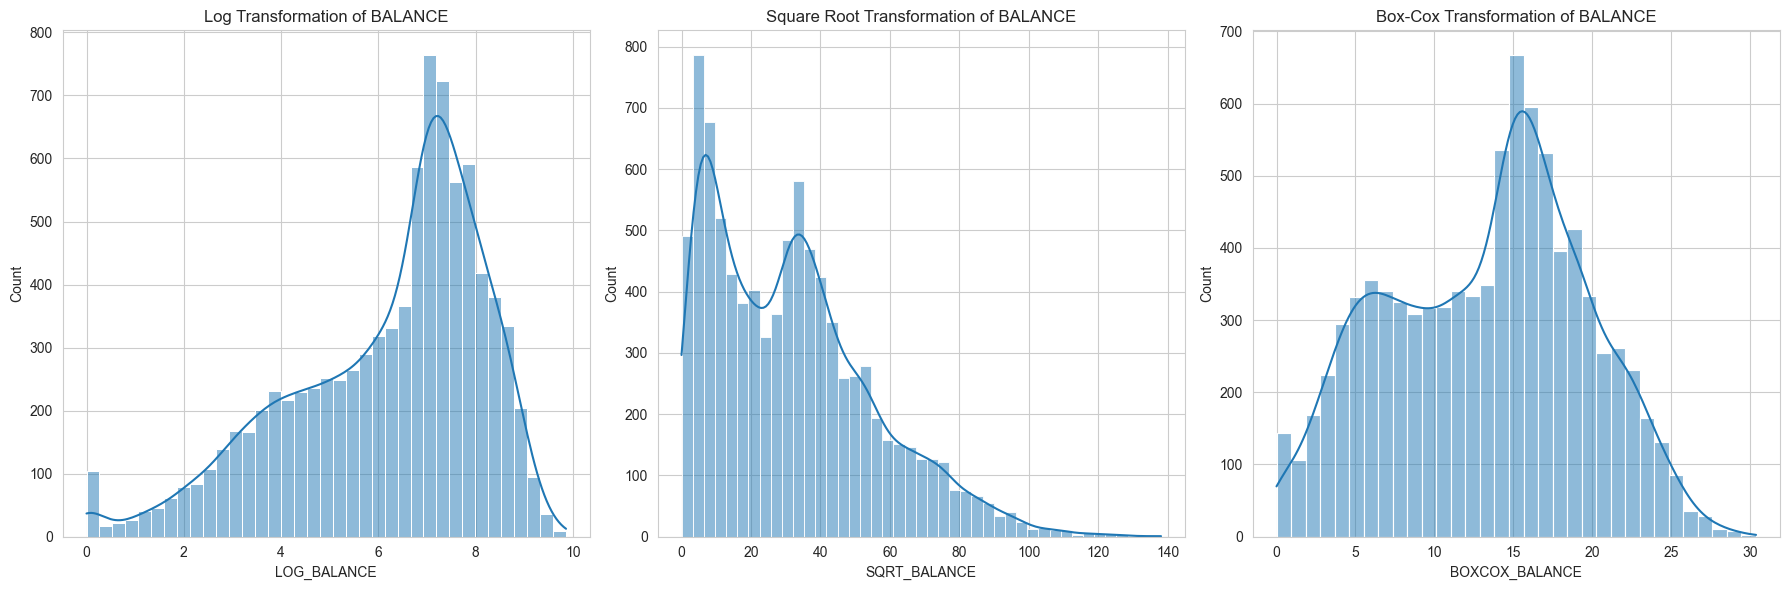

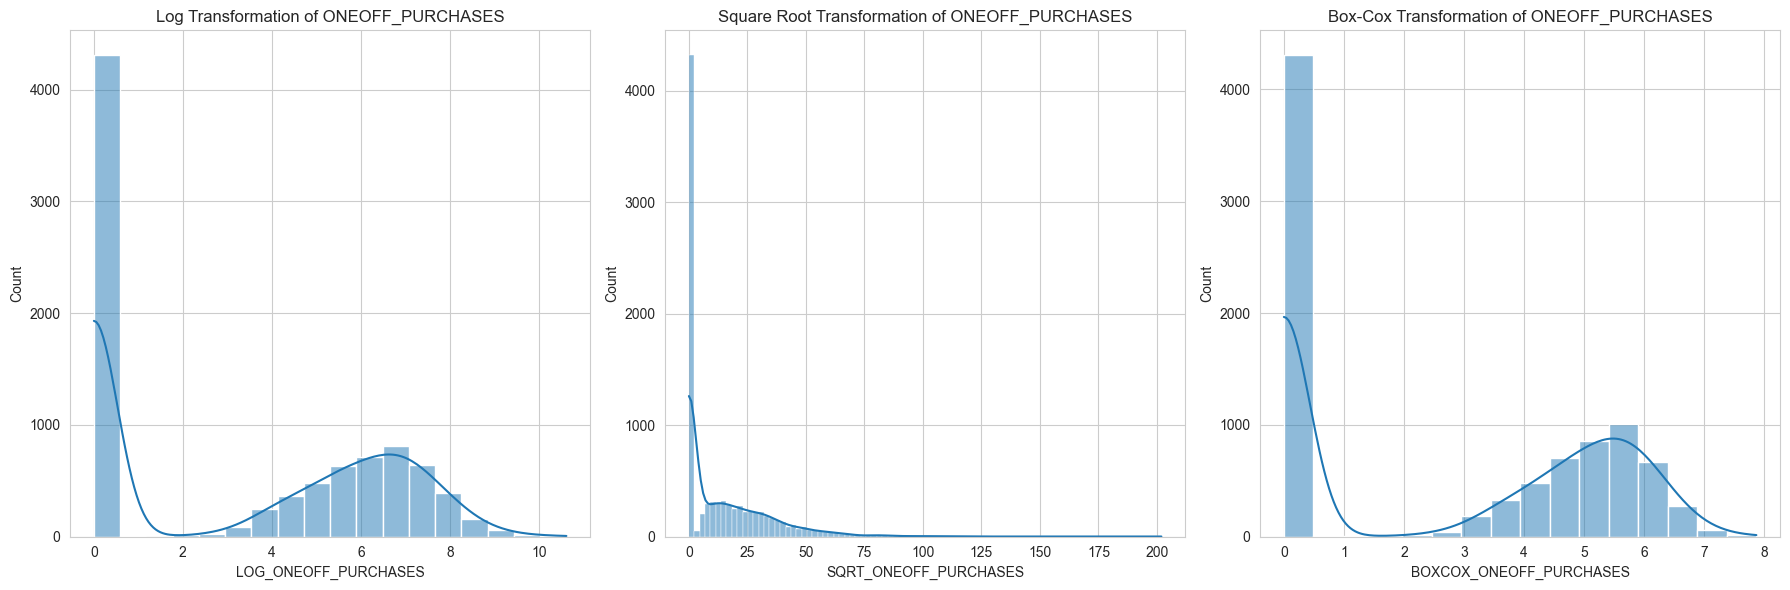

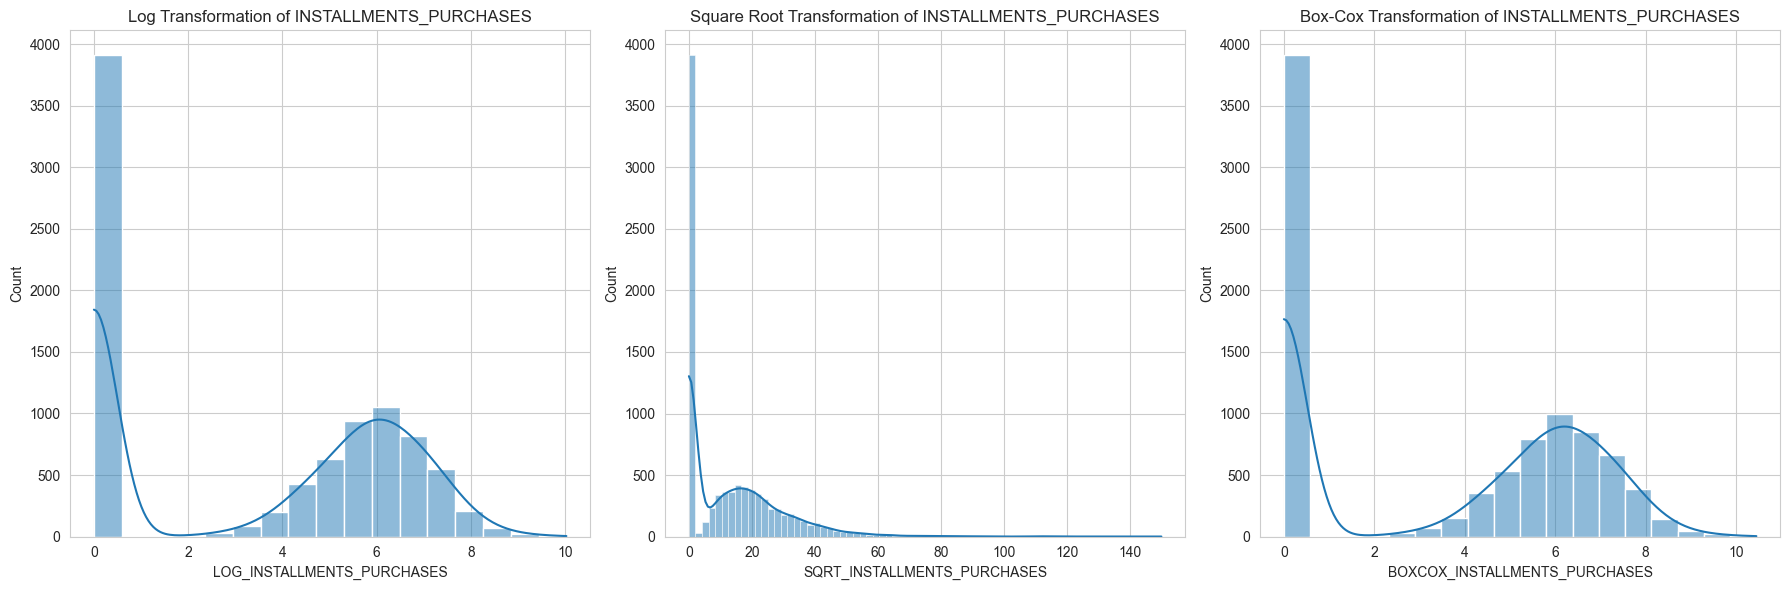

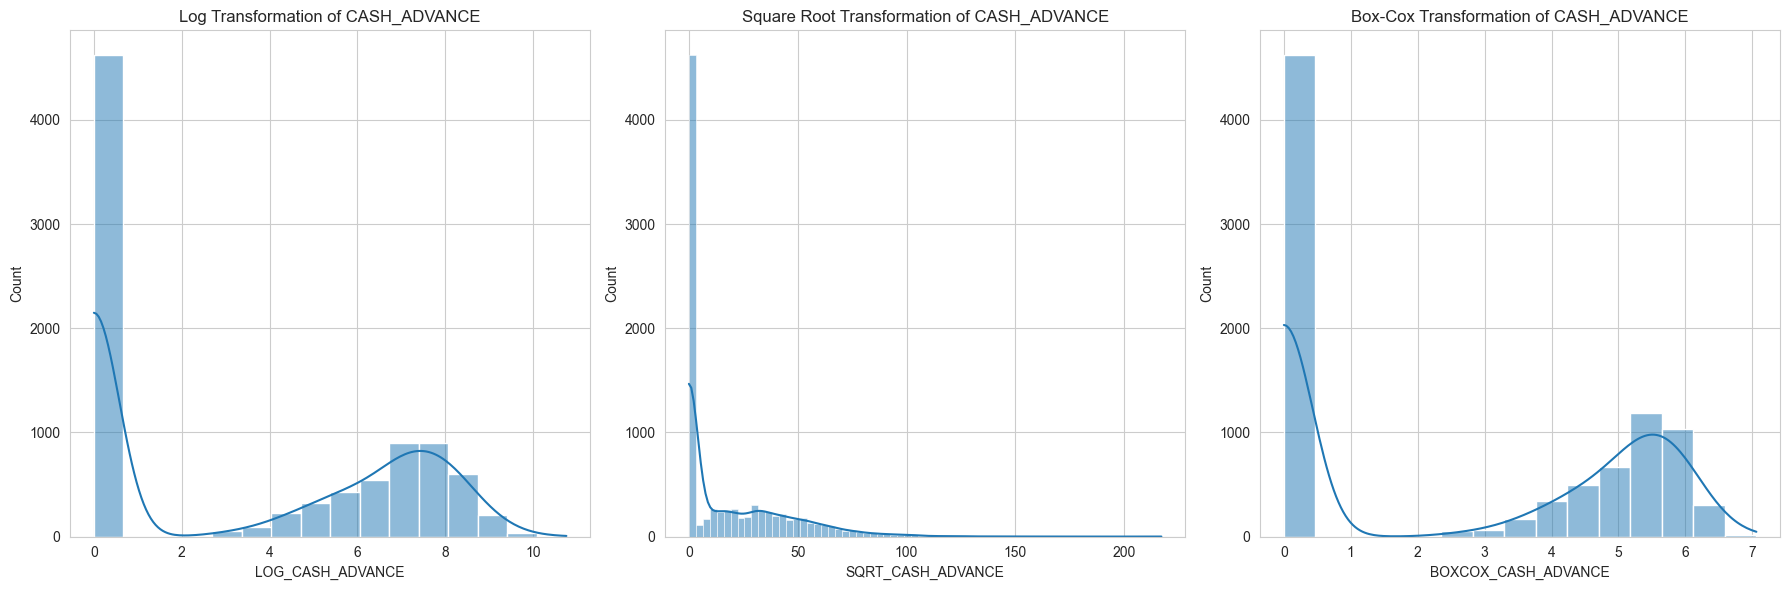

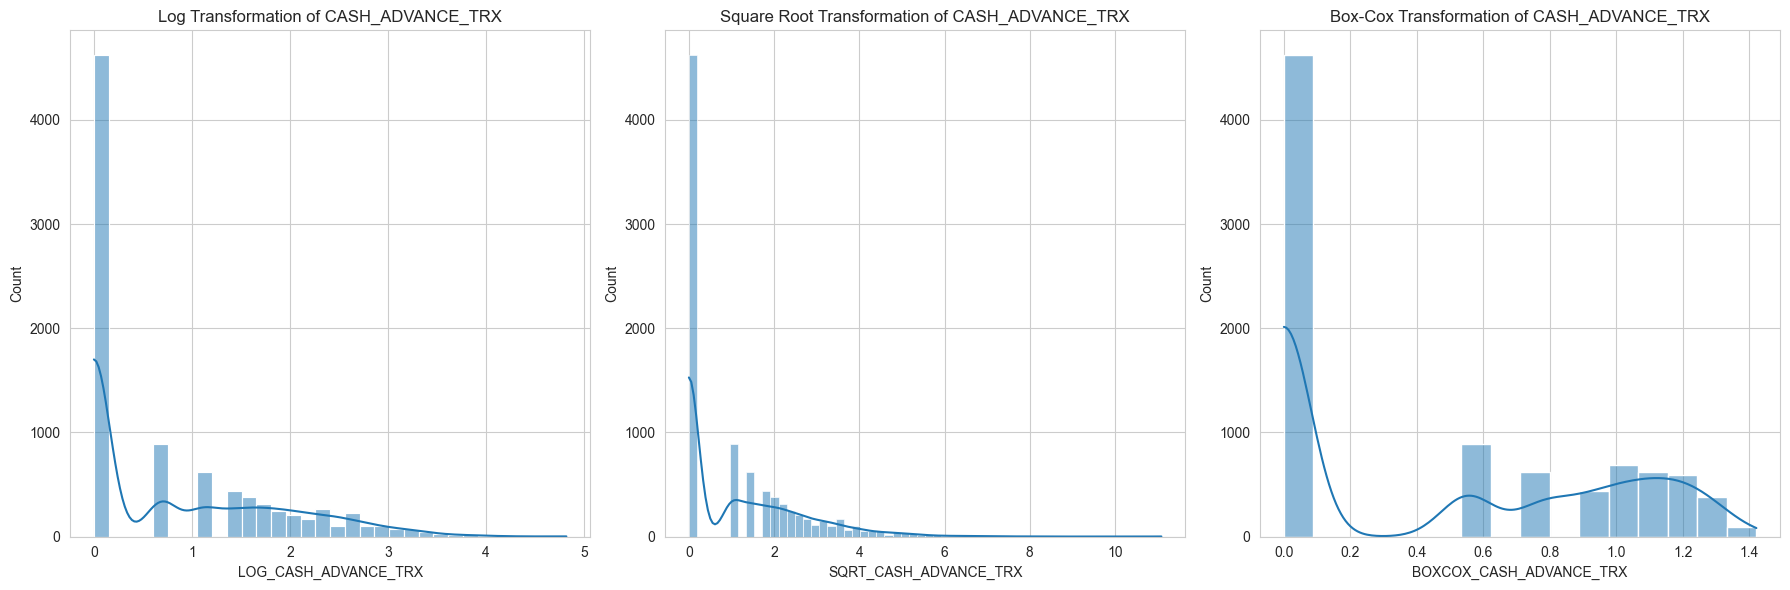

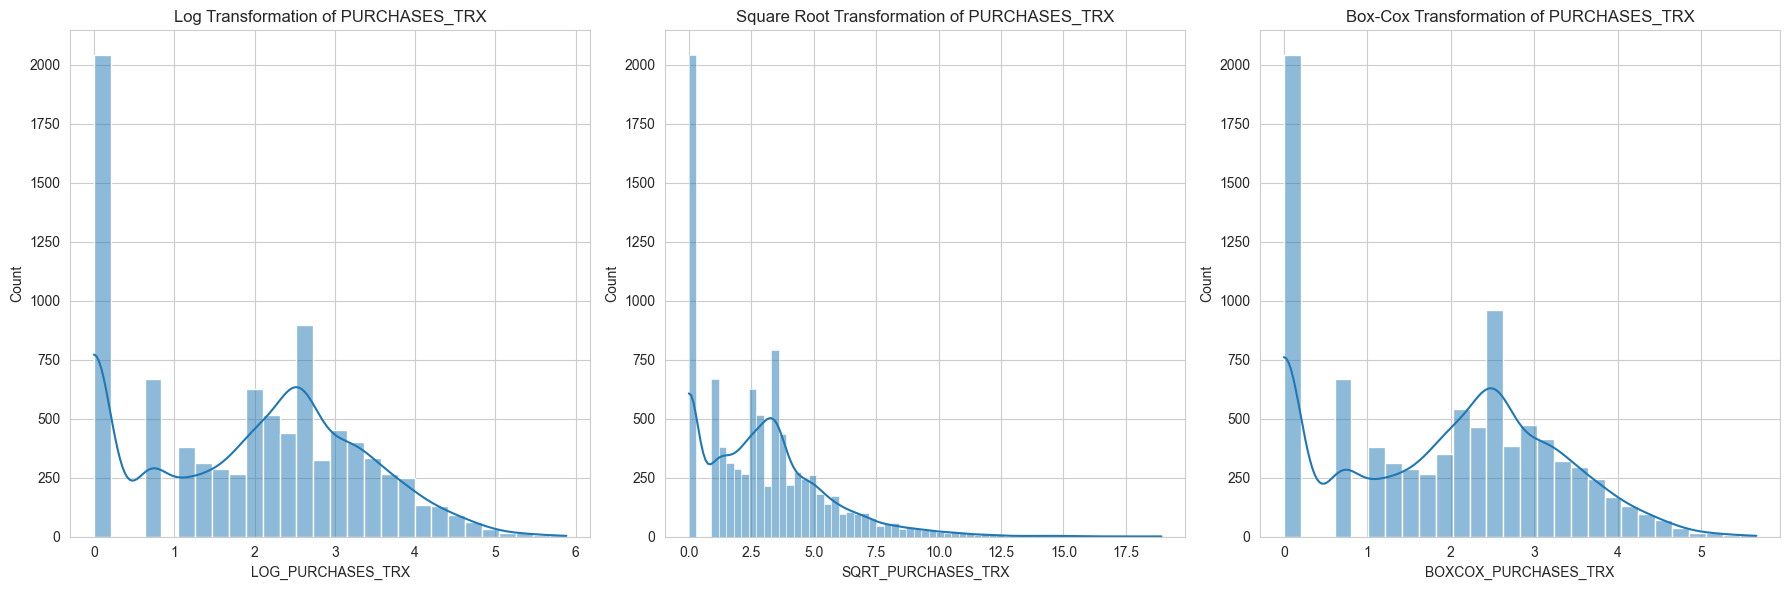

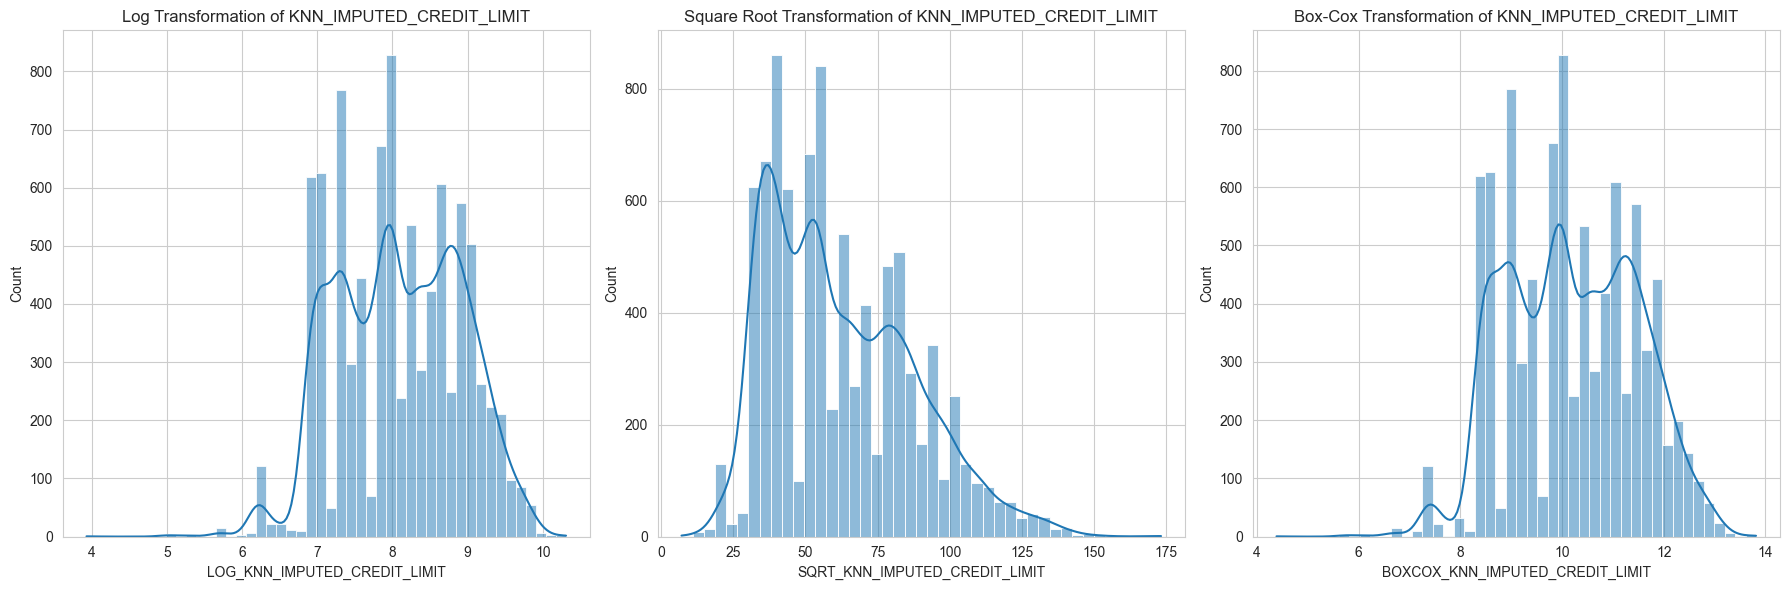

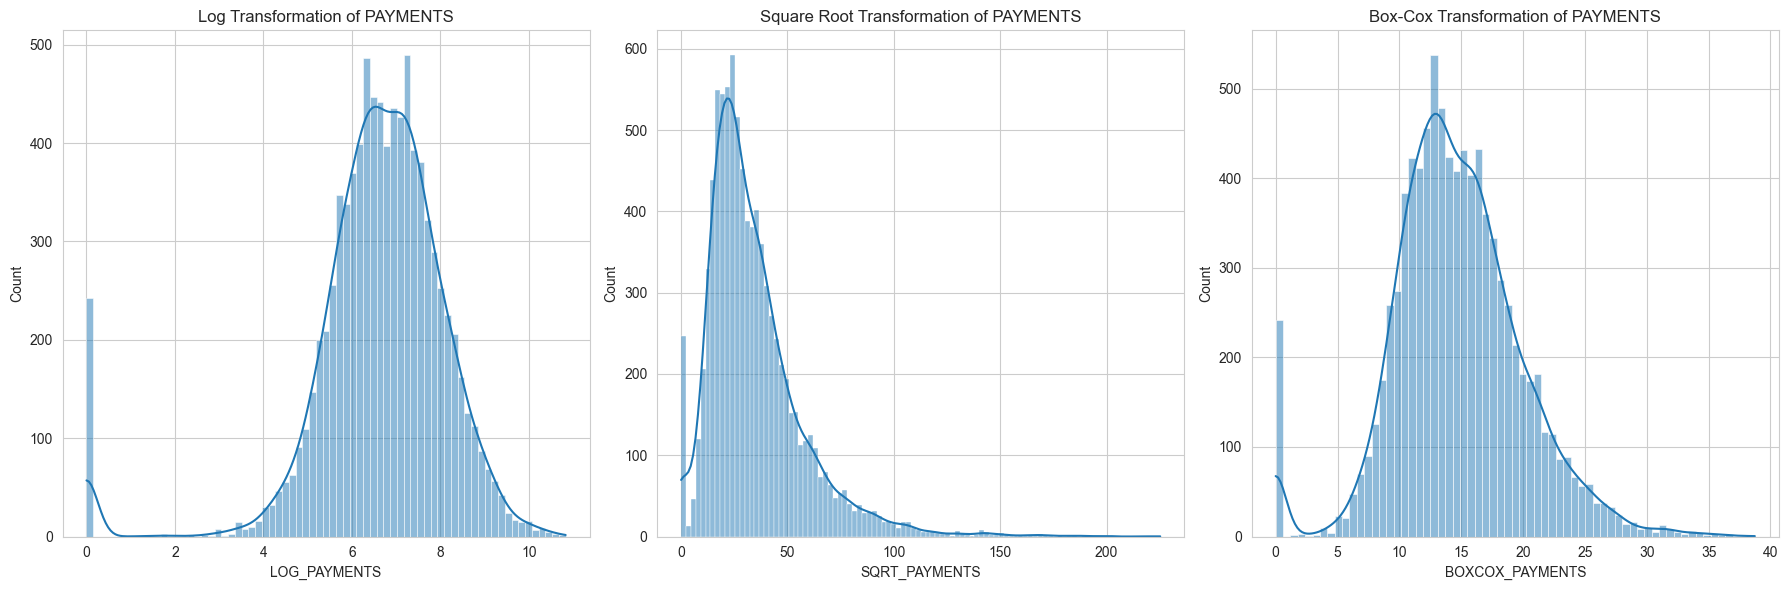

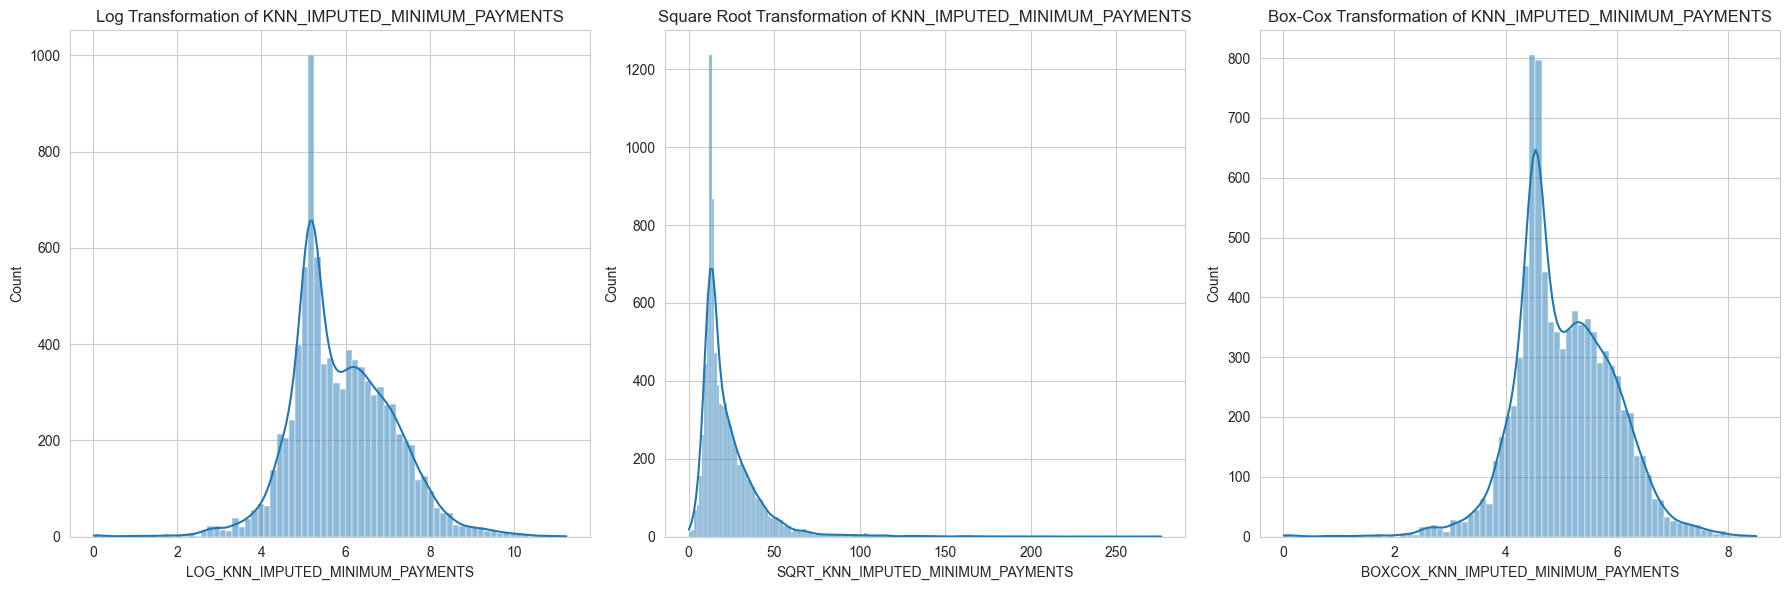

In [5]:
# Define a function to apply transformations
def transform_features(df, features):
    df_transformed = df.copy()
    
    series_lambdas = pd.Series(index = features, name = 'OPTIMAL_LAMBDA')
    for feature in features:
        # Log transformation
        df_transformed[f'LOG_{feature}'] = np.log1p(df_transformed[feature])

        # Square root transformation
        df_transformed[f'SQRT_{feature}'] = np.sqrt(df_transformed[feature])

        # Box-Cox transformation (only for positive values)
        # Letting the function find the optimal lambda according to maximum likelihood criterion
        df_transformed[f'BOXCOX_{feature}'], series_lambdas[feature] = stats.boxcox(df_transformed[feature] + 1)  # Adding 1 to avoid zero values

    return df_transformed, series_lambdas

# Apply transformations
df_transformed, series_lambdas = transform_features(df, skewed_cols)

# Plot the distributions of the transformed features
for feature in skewed_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.histplot(df_transformed[f'LOG_{feature}'], kde=True, ax=axes[0])
    axes[0].set_title(f'Log Transformation of {feature}')

    sns.histplot(df_transformed[f'SQRT_{feature}'], kde=True, ax=axes[1])
    axes[1].set_title(f'Square Root Transformation of {feature}')

    sns.histplot(df_transformed[f'BOXCOX_{feature}'], kde=True, ax=axes[2])
    axes[2].set_title(f'Box-Cox Transformation of {feature}')

    plt.tight_layout()
    plt.show()

In [6]:
sqrt_transformed_cols = ['SQRT_BALANCE', 'SQRT_ONEOFF_PURCHASES', 'SQRT_INSTALLMENTS_PURCHASES', 'SQRT_CASH_ADVANCE', 'SQRT_CASH_ADVANCE_TRX', 'SQRT_PURCHASES_TRX', 'SQRT_KNN_IMPUTED_CREDIT_LIMIT', 'SQRT_PAYMENTS', 'SQRT_KNN_IMPUTED_MINIMUM_PAYMENTS']
log_transformed_cols =  ['LOG_BALANCE', 'LOG_ONEOFF_PURCHASES', 'LOG_INSTALLMENTS_PURCHASES', 'LOG_CASH_ADVANCE', 'LOG_CASH_ADVANCE_TRX', 'LOG_PURCHASES_TRX', 'LOG_KNN_IMPUTED_CREDIT_LIMIT', 'LOG_PAYMENTS', 'LOG_KNN_IMPUTED_MINIMUM_PAYMENTS']

df_transformed = df_transformed.drop(skewed_cols + sqrt_transformed_cols + log_transformed_cols, axis = 1)
df_transformed

,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,BOXCOX_BALANCE,BOXCOX_ONEOFF_PURCHASES,BOXCOX_INSTALLMENTS_PURCHASES,BOXCOX_CASH_ADVANCE,BOXCOX_CASH_ADVANCE_TRX,BOXCOX_PURCHASES_TRX,BOXCOX_KNN_IMPUTED_CREDIT_LIMIT,BOXCOX_PAYMENTS,BOXCOX_KNN_IMPUTED_MINIMUM_PAYMENTS
CUST_ID,,,,,,,,,,,,,,,
C10001,0.818182,0.000000,0.083333,0.000000,0.000000,12,5.524100,0.000000,4.656581,0.000000,0.000000,1.090792,8.382484,9.475915,4.358612
C10002,0.909091,0.000000,0.000000,0.250000,0.222222,12,19.863824,0.000000,0.000000,6.190042,0.980624,0.000000,11.367326,21.433772,5.848854
C10003,1.000000,1.000000,0.000000,0.000000,0.000000,12,18.665676,5.492713,0.000000,0.000000,0.000000,2.522589,11.479082,13.123323,5.471550
C10004,0.636364,0.083333,0.000000,0.083333,0.000000,12,16.849318,5.929219,0.000000,4.290456,0.553324,0.690028,11.479082,0.000000,5.229746
C10005,1.000000,0.083333,0.000000,0.000000,0.000000,12,13.977587,2.607174,0.000000,0.000000,0.000000,0.690028,8.648834,13.439779,4.784361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,1.000000,0.000000,0.833333,0.000000,0.500000,6,4.814878,0.000000,5.813596,0.000000,0.000000,1.921464,8.382484,10.924810,3.536640
C19187,1.000000,0.000000,0.833333,0.000000,0.000000,6,4.102002,0.000000,5.844997,0.000000,0.000000,1.921464,8.382484,10.406733,4.531389
C19188,0.833333,0.000000,0.666667,0.000000,0.250000,6,4.451801,0.000000,5.084243,0.000000,0.000000,1.771019,8.382484,7.083947,3.950286


# 2.0 Feature Scaling

Here three methods are experimented:
1. Standard Scaling
2. Min-max Scaling

## 2.1 Standard Scaling

In [7]:
standard_scaler = StandardScaler()
standard_scaled_transformed_data = standard_scaler.fit_transform(df_transformed)

df_standard_scaled_transformed = pd.DataFrame(standard_scaled_transformed_data, index = df_transformed.index, columns = 'STANDARD_' + df_transformed.columns)
df_standard_scaled_transformed

,STANDARD_BALANCE_FREQUENCY,STANDARD_ONEOFF_PURCHASES_FREQUENCY,STANDARD_PURCHASES_INSTALLMENTS_FREQUENCY,STANDARD_CASH_ADVANCE_FREQUENCY,STANDARD_PRC_FULL_PAYMENT,STANDARD_TENURE,STANDARD_BOXCOX_BALANCE,STANDARD_BOXCOX_ONEOFF_PURCHASES,STANDARD_BOXCOX_INSTALLMENTS_PURCHASES,STANDARD_BOXCOX_CASH_ADVANCE,STANDARD_BOXCOX_CASH_ADVANCE_TRX,STANDARD_BOXCOX_PURCHASES_TRX,STANDARD_BOXCOX_KNN_IMPUTED_CREDIT_LIMIT,STANDARD_BOXCOX_PAYMENTS,STANDARD_BOXCOX_KNN_IMPUTED_MINIMUM_PAYMENTS
CUST_ID,,,,,,,,,,,,,,,
C10001,-0.249434,-0.678661,-0.707313,-0.675349,-0.525551,0.360680,-1.238103,-1.000488,0.383704,-0.944538,-0.905801,-0.573664,-1.425308,-0.983876,-0.786248
C10002,0.134325,-0.678661,-0.916995,0.573963,0.234227,0.360680,1.051961,-1.000488,-1.085422,1.399909,1.044342,-1.387624,0.924254,1.285321,0.911562
C10003,0.518084,2.673451,-0.916995,-0.675349,-0.525551,0.360680,0.860616,1.065381,-1.085422,-0.944538,-0.905801,0.494757,1.012225,-0.291722,0.481706
C10004,-1.016953,-0.399319,-0.916995,-0.258913,-0.525551,0.360680,0.570542,1.229556,-1.085422,0.680451,0.194580,-0.872718,1.012225,-2.782085,0.206221
C10005,0.518084,-0.399319,-0.916995,-0.675349,-0.525551,0.360680,0.111925,-0.019902,-1.085422,-0.944538,-0.905801,-0.872718,-1.215647,-0.231669,-0.301198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,0.518084,-0.678661,1.179833,-0.675349,1.183951,-4.122768,-1.351366,-1.000488,0.748736,-0.944538,-0.905801,0.046192,-1.425308,-0.708925,-1.722708
C19187,0.518084,-0.678661,1.179833,-0.675349,-0.525551,-4.122768,-1.465213,-1.000488,0.758643,-0.944538,-0.905801,0.046192,-1.425308,-0.807239,-0.589406
C19188,-0.185477,-0.678661,0.760469,-0.675349,0.329200,-4.122768,-1.409349,-1.000488,0.518629,-0.944538,-0.905801,-0.066072,-1.425308,-1.437791,-1.251447


## 2.2 Min-Max Scaling

In [8]:
minmax_scaler = MinMaxScaler(feature_range = (0, 1))

minmax_scaled_transformed_data = minmax_scaler.fit_transform(df_transformed)

df_minmax_scaled_transformed = pd.DataFrame(minmax_scaled_transformed_data, index = df_transformed.index, columns = 'MINMAX_' + df_transformed.columns)
df_minmax_scaled_transformed

,MINMAX_BALANCE_FREQUENCY,MINMAX_ONEOFF_PURCHASES_FREQUENCY,MINMAX_PURCHASES_INSTALLMENTS_FREQUENCY,MINMAX_CASH_ADVANCE_FREQUENCY,MINMAX_PRC_FULL_PAYMENT,MINMAX_TENURE,MINMAX_BOXCOX_BALANCE,MINMAX_BOXCOX_ONEOFF_PURCHASES,MINMAX_BOXCOX_INSTALLMENTS_PURCHASES,MINMAX_BOXCOX_CASH_ADVANCE,MINMAX_BOXCOX_CASH_ADVANCE_TRX,MINMAX_BOXCOX_PURCHASES_TRX,MINMAX_BOXCOX_KNN_IMPUTED_CREDIT_LIMIT,MINMAX_BOXCOX_PAYMENTS,MINMAX_BOXCOX_KNN_IMPUTED_MINIMUM_PAYMENTS
CUST_ID,,,,,,,,,,,,,,,
C10001,0.818182,0.000000,0.083333,0.000000,0.000000,1.0,0.181840,0.000000,0.445536,0.000000,0.000000,0.192596,0.424004,0.244633,0.511360
C10002,0.909091,0.000000,0.000000,0.166667,0.222222,1.0,0.653869,0.000000,0.000000,0.876605,0.689814,0.000000,0.740433,0.553340,0.686963
C10003,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.614429,0.698018,0.000000,0.000000,0.000000,0.445403,0.752281,0.338796,0.642503
C10004,0.636364,0.083333,0.000000,0.055555,0.000000,1.0,0.554639,0.753489,0.000000,0.607595,0.389232,0.121835,0.752281,0.000000,0.614010
C10005,1.000000,0.083333,0.000000,0.000000,0.000000,1.0,0.460108,0.331321,0.000000,0.000000,0.000000,0.121835,0.452240,0.346965,0.561528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,1.000000,0.000000,0.833333,0.000000,0.500000,0.0,0.158494,0.000000,0.556238,0.000000,0.000000,0.339265,0.424004,0.282038,0.414503
C19187,1.000000,0.000000,0.833333,0.000000,0.000000,0.0,0.135028,0.000000,0.559242,0.000000,0.000000,0.339265,0.424004,0.268663,0.531719
C19188,0.833333,0.000000,0.666667,0.000000,0.250000,0.0,0.146543,0.000000,0.486454,0.000000,0.000000,0.312701,0.424004,0.182881,0.463245


# Saving the Dataset and Scalers

In [9]:
with open(r'../raw_data/standard_scaler.pkl', 'wb') as file:
    pickle.dump(standard_scaler, file)
    
with open(r'../raw_data/minmax_scaler.pkl', 'wb') as file:
    pickle.dump(minmax_scaler, file)
    
df_lambdas = series_lambdas.reset_index()
df_lambdas.columns = ['FEATURE', 'OPTIMAL_LAMBDA']
df_lambdas.to_csv(r'../raw_data/boxcox_lambdas.csv', index = False)

df_standard_scaled_transformed.to_csv(r'../raw_data/standard_scaled_customer.csv')